#### Details

- Name: Suvashin Moodliar
- Student-Number: 10116408
- Module: PDAN8411

### Linear Regression

##### Overview
Linear Regression is a method used in statistics. It essentially models a relationship between a dependant variable and one or more independent variables by fitting a linear equation.
It seems to be used a lot and is simpler compared to other models, however, there does seem to be assumptions made by this popular model which we will cover further down in the note-book. I am of the opinion that due to the simplicity of the model it cannot adapt well to data that posesses a level of seasonality or severe outliers, with that being said it should definitely be a note-worthy bench mark against more complex/experimental models.

##### Variables
Let's talk a little about this models use of variables. I mentioned above that this model tries to draw a relationship between a dependent variable, (which can be something like the price of ice-cream, this is also known as the response or outcome variable, which makes sense since if we were to get the prediction of a houses price based on factors such as its' area, number of rooms and number of parking slots, the house price would end up being out outcome since the price is predicted) and one or more independent variables (this can be the season of year, the weather on any given day, time or even geography). The end goal of this model is to be able to predict the dependent variable (eg. House Price) based on the independent variable values (eg. Location, Area, Room Numbers)

##### Linear Relationship
The model has some assumptions. One of them is that it assumes that there is a relationship between the independent variables and the dependent variable.
That assumed relationship can be expressed mathematically as a straight line equation:
$ŷ=β₀+β₁x$

- $ŷ$ is the predicted value of $y$, (eg. Lemonade Price) for a given $x$, (eg. Number of Lemonade Sales). All $ŷ$ values fall on the linear regression line. $β₀$ and $β₁$ are the regression coefficients.
- $β₀$ is the intercept. This is the $y$ intercept (where the line of the graph crosses the $y$-axis or the value of $y$ when $x$ is $0$).
- $β₁$ is the coefficient of the input feature $x$ (our independent variable), it is the slope of the line. It shows the impact $x$ has on $y$. Therefore the linear regression model assumes that if $x$ increases by $1$, $y$ increases by $β₁$ (This is only possible when $x$ and $y$ have a perfect linear relationship, which, in reality is hardly the case)
$β₀$ ($y$ intercept) and $β₁$ (slope) are both learned from the dataset by the model.
Thus, when a linear regression model is fit, the model is responsible for estimating the best values for $β₀$ and $β₁$ based on the dataset.

But what if you don't only want predict ice-cream sales based only on the weather but the price and location your stall is in, then what? Well there's a formula for multiple independent variables in order to predict one dependent variables: $ŷ=β₀+β₁x₁+β₂x₂+…+βₙxₙ$

##### Types of Linear Regression:
There are few different types of Linear Regression:
- Simple Linear Regression: 1 dependent variable, 1 independent variable
- Multiple Linear Regression: 1 dependent variable, multiple independent variables
- Polynomial Regression: 1 dependent, polynomial functions of multiple independent variables

Others include:
- Ridge Regression
- Lasso Regression
- Elastic Net Regression

For this notebook we will just be exploring Simple Linear Regression as well as Multiple Linear Regression

##### Assumptions of Linear Regression:
- Linearity - The model assumes that there is some kind of linear relationship between the independent and dependent variables.
- Independence - the residuals (differences between observed and predicted values) are independent of each other. In other words, if there is an underlying pattern regarding how residuals occur then this model cannot cater for that, it assumes residuals occur independently
- Homoscedasticity: The variance of the residuals is constant across all levels of the independent variables. So if the model gets predictions wrong, how much that varies compared to other residuals is the same.
- Normality: The residuals follow a normal distribution. Meaning that our wrong predictions in most cases should be somewhat close to the actual data and only have minimal instance where the model was completely off.



### Chosen Data set
Data set Choice: Housing Prices Dataset 

Reasons for chosen Dataset:
- The property market is rarely unstable compared to other datasets involving prices, this means that we should have an easier time training a model and get it to have a decent accuracy. 
- I have an interest in property data
- 
The reason I went with this dataset is because housing prices do not have extremely high variance


In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

HouseDF_original = pd.read_csv('Housing.csv')
HouseDF_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop specified columns
HouseDF = HouseDF_original.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1)

HouseDF.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [380]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [381]:
HouseDF.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [382]:
HouseDF.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

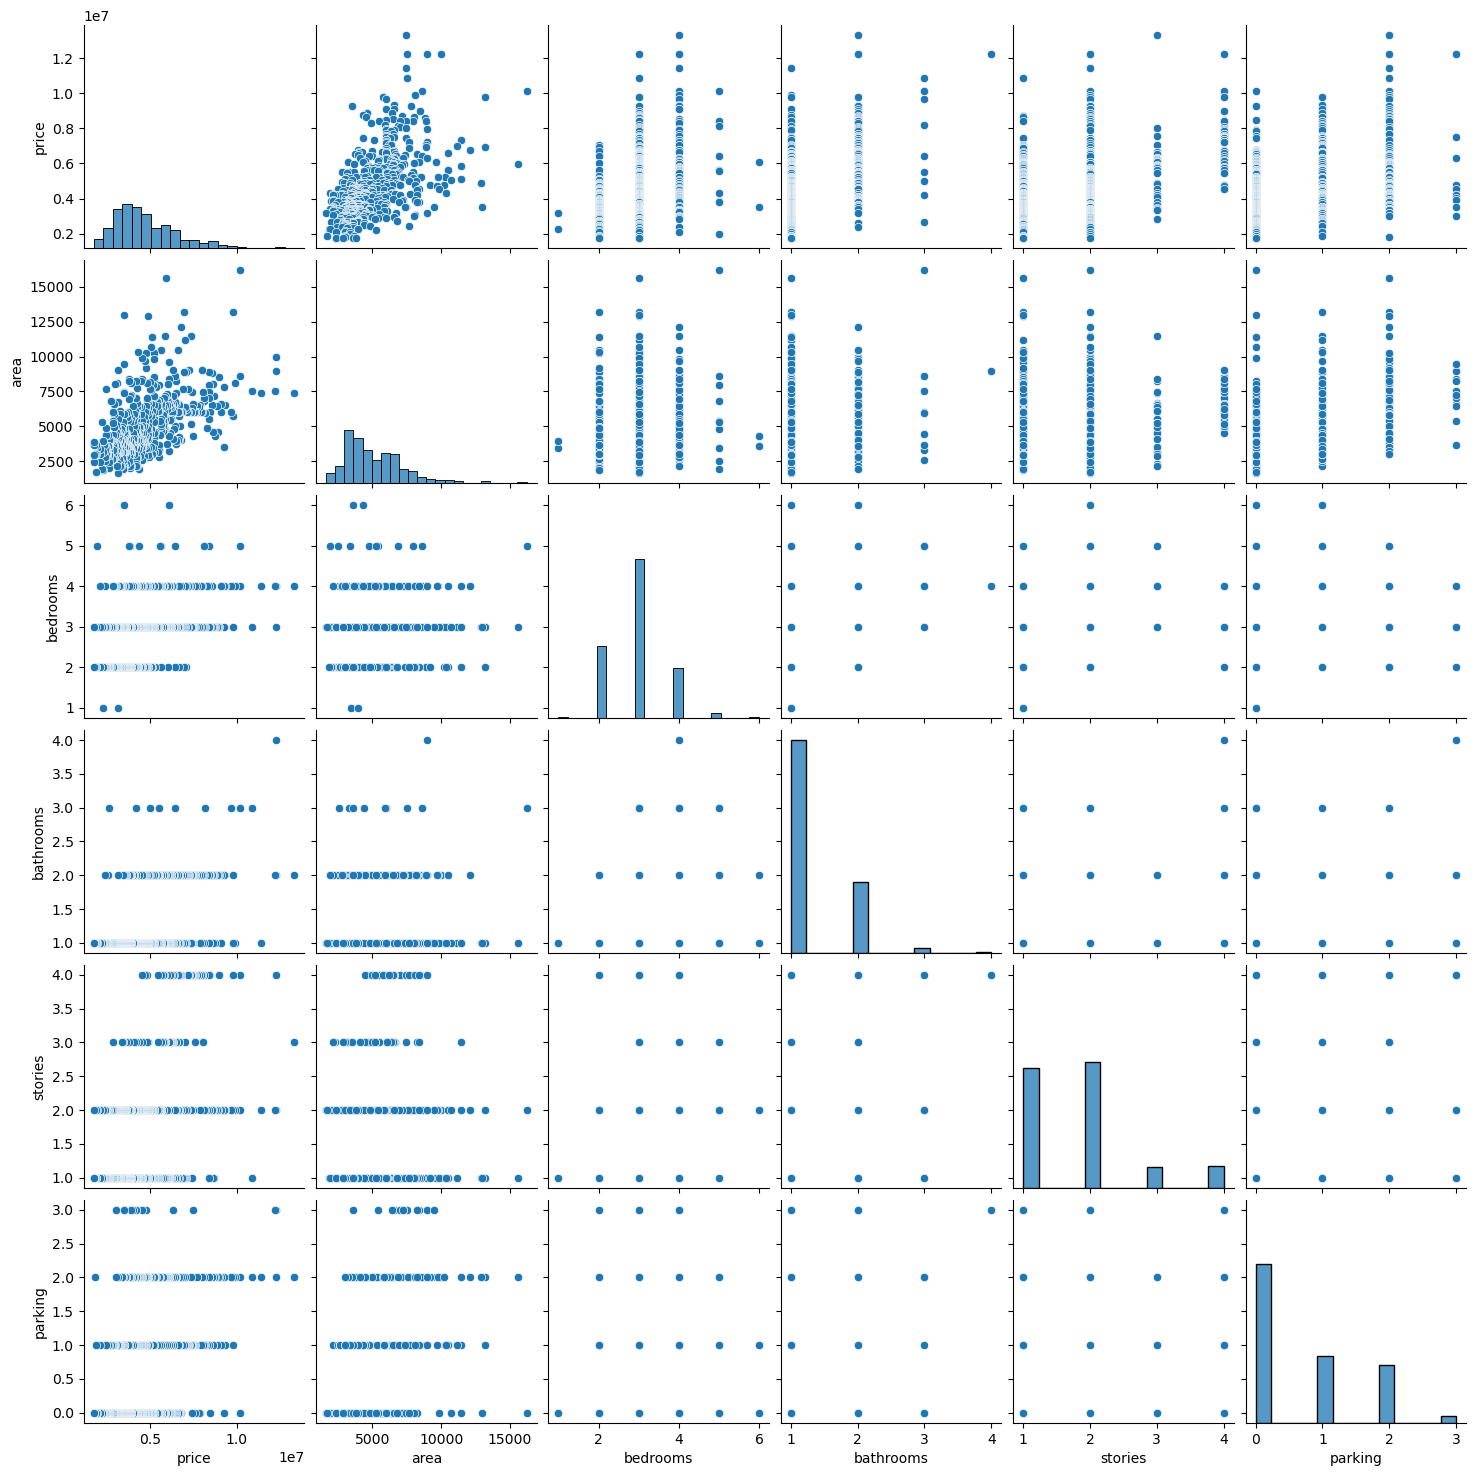

In [383]:
sns.pairplot(HouseDF)


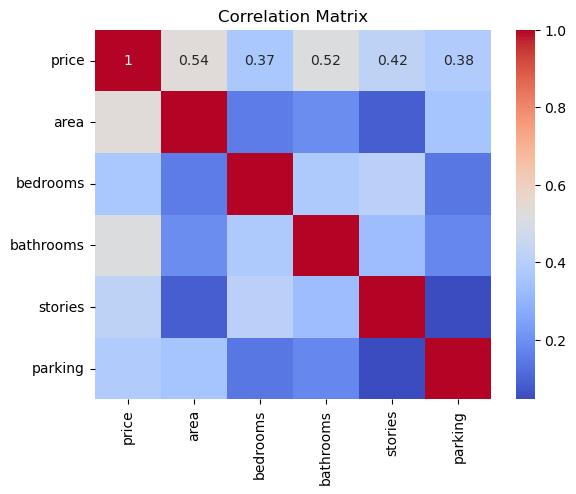

In [384]:
sns.heatmap(HouseDF.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [385]:
# Check for missing values
print(HouseDF.isnull().sum())

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


In [386]:
# Preprocessing: Selecting features and target variable
X = HouseDF[['area']]
y = HouseDF['price']



In [387]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [389]:
# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3675286604768.185
R-squared: 0.27287851871974644


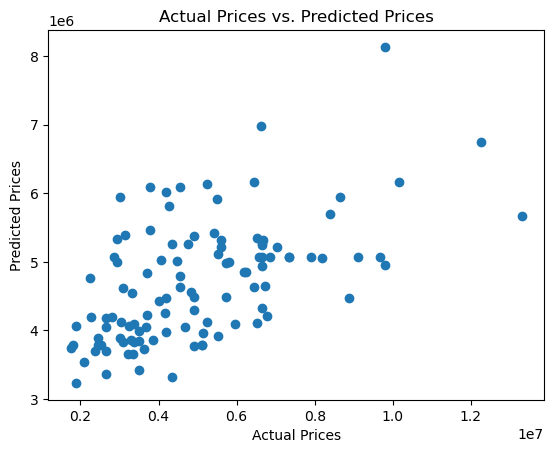

In [390]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

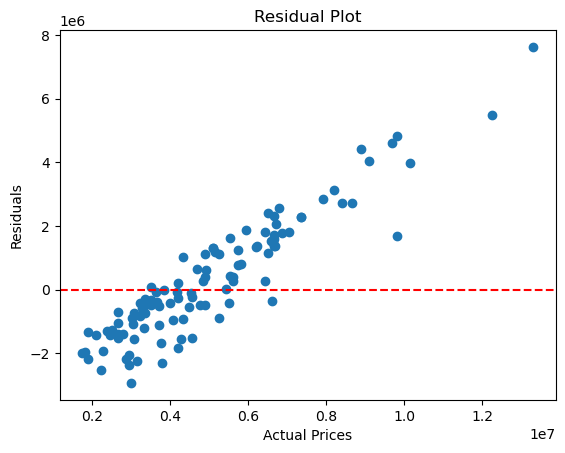

In [391]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [392]:
# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[8000]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 5918092.999469606


c:\Users\Suvashin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# References

1. Author Last Name, First Initial. (Year). *Title of the Book*. Publisher.
2. Author Last Name, First Initial. (Year). "Title of the Article." *Journal Name*, Volume(Issue), Page Range.
3. Yasser, M. (2024). *Housing Prices Dataset*. kaggle.com. [URL](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)
4. Author Last Name, First Initial. (Year). *Title of the Thesis*. University Name. URL
5. Author Last Name, First Initial. (Year). *Title of the Conference Paper*. Conference Name, Location, Page Range.
